<center>
<h1>TensorFlow Guides</h1>
</center>

- [TensorFlow Guide](https://www.tensorflow.org/guide/basics)
- [Basic training loops](https://www.tensorflow.org/guide/basic_training_loops)

***

> Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`.

> ``class GradientTape`` →Record operations for automatic differentiation. Operations are recorded if they are executed within this context manager and at least one of their inputs is being "watched".

> `tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. (i) You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state; e (ii) You can import and export the `tf.Variable` values _and_ the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

> The `tf.data.Dataset` API has useful functions for batching and shuffling.

> All tensors are immutable like Python numbers and strings: you can never update the contents of a tensor, only create a new one.

> Tensors have shapes.  Some vocabulary:
> - **Shape**: The length (number of elements) of each of the axes of a tensor.
> - **Rank**: Number of tensor axes.  A scalar has rank 0, a vector has rank 1, a matrix is rank 2.
> - **Axis** or **Dimension**: A particular dimension of a tensor.
> - **Size**: The total number of items in the tensor, the product of the shape vector's elements.

> While axes are often referred to by their indices, you should always keep track of the meaning of each. Often axes are ordered from global to local: The batch axis first, followed by spatial dimensions, and features for each location last. This way feature vectors are contiguous regions of memory.
> 
> ![](assets/2023-06-05-14-52-04.png)

> If you flatten a tensor you can see what order it is laid out in memory.

> Sometimes, your data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.

> Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

> Although variables are important for differentiation, some variables will not need to be differentiated.  You can turn off gradients for a variable by setting `trainable` to false at creation.






In [1]:
import tensorflow as tf

In [3]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


In [5]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [6]:
rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)

In [7]:
l = [1, 2, 3]

print(tf.square(l))
print(tf.reduce_mean(l))

tf.Tensor([1 4 9], shape=(3,), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


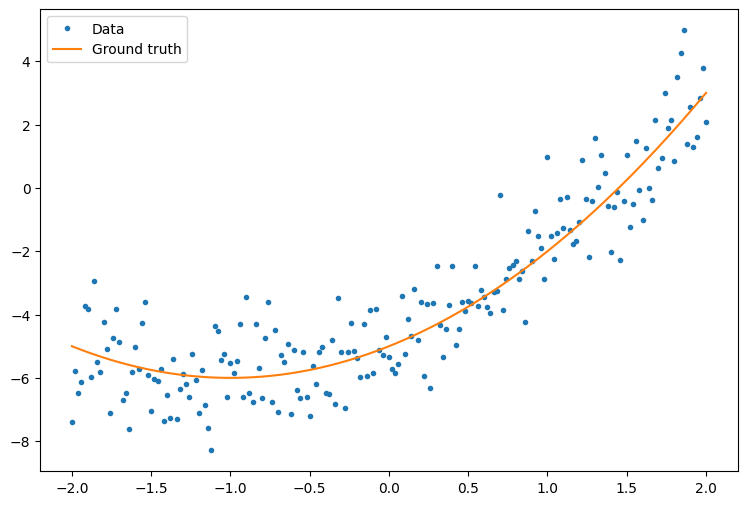

In [8]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

In [9]:
class Model(tf.Module):

  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b
  
quad_model = Model()

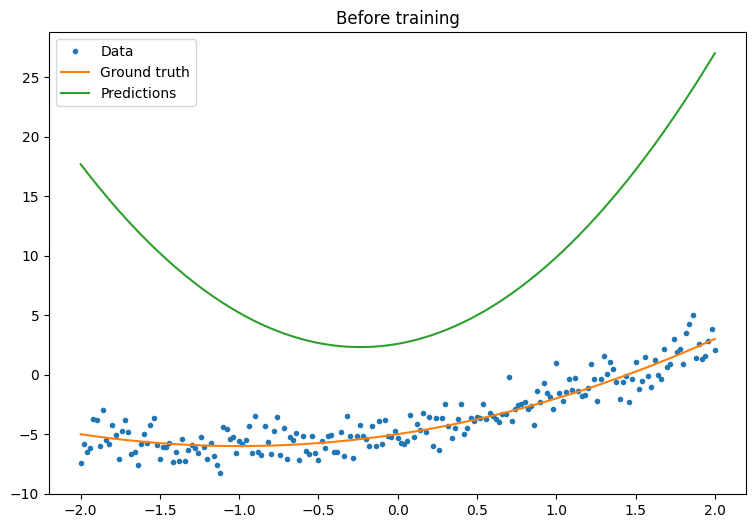

In [10]:
def plot_preds(x, y, f, model, title):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

plot_preds(x, y, f, quad_model, 'Before training')

In [11]:
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

In [12]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [20]:
c = tf.constant([[4., 5.], [10., 1.]])

# Compute the softmax
print(tf.nn.softmax(c)[0][0])

tf.Tensor(0.26894143, shape=(), dtype=float32)
